In [98]:
# f = (f' - B - d * t) / med (f' - b - d * t)
# D = D' - B
# B = B' + Berr

In [99]:
import numpy as np
import matplotlib.pyplot as plt

In [100]:
num_Of_pixels = 10 
dark_prime_per_sec_pix = 2 
flatupper = 1.3
flatlower = 0.8
bias_electrons_per_atod = 400 
atod_gain = 10
biasErrupper = 0.2
biasErrlower = 0.01
time = 300 

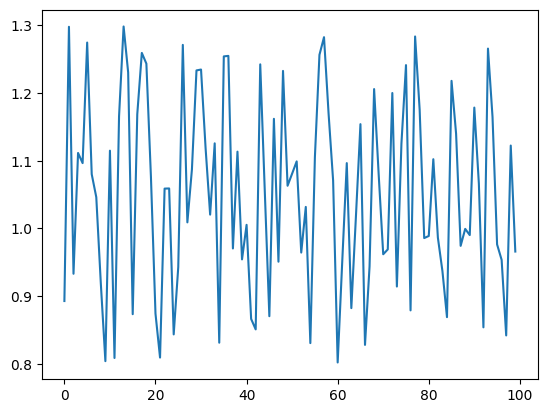

In [101]:
# Define the range for random floats and the size of the array
min_value = flatlower
max_value = flatupper
bin = num_Of_pixels * num_Of_pixels # You can change this to the desired size

# Generate an array of random floats
flatPrime = np.random.uniform(min_value, max_value, bin)

plt.plot(flatPrime)


In [102]:
# the bias per pixels 
bias = bias_electrons_per_atod * atod_gain 
biasPrime = np.linspace(biasErrlower, biasErrupper, bin)
# the dark that should be
darkPrime = dark_prime_per_sec_pix * time
# flat field propagation 
mean_displacement = []
for b in biasPrime:  
    master_bias = np.random.normal(bias, bias * b, bin)
    master_dark = darkPrime + master_bias
    flat = flatPrime - master_dark - master_bias
    flat /= np.mean(flat)
    displacement = np.mean(np.abs((flat - flatPrime)) / flatPrime)
    mean_displacement.append(displacement) 

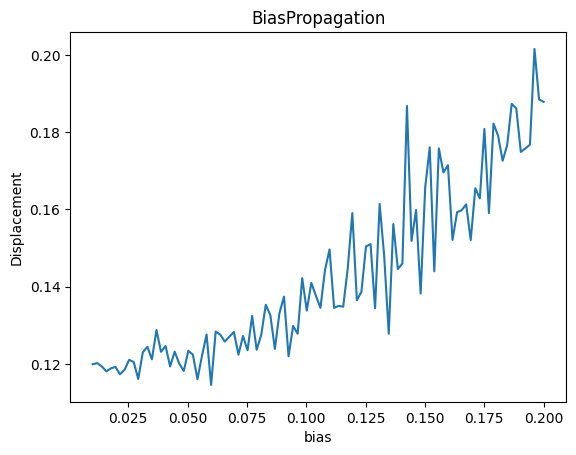

In [103]:
plt.plot(biasPrime, mean_displacement)
plt.title("BiasPropagation")
# naming the x axis
plt.xlabel('bias')
# naming the y axis
plt.ylabel('Displacement')
plt.show()

The best estimate of the slope is 0.363
The best estimate of the intercept 0.104
[[ 2.96991193e-04 -3.11840753e-05]
 [-3.11840753e-05  4.18582587e-06]]
The slope is 0.363 +/- 0.017
The intercept is 0.104 +/- 0.002


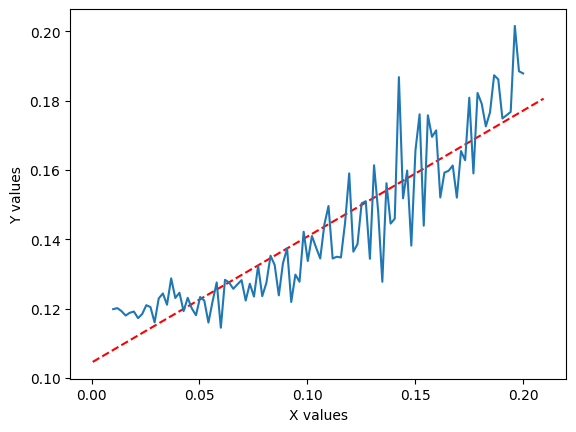

In [105]:
fit = np.polyfit(biasPrime,mean_displacement,1,full=False, cov=True)

# Fit parameters are the first element in the returned "tuple"
fitparams = fit[0]
slope = fitparams[0]
intercept = fitparams[1]

print('The best estimate of the slope is %.3f' % slope)
print('The best estimate of the intercept %.3f' % intercept)

# Covariance matrix is the second element in the returned "tuple"
cov = fit[1]
print(cov)

# This is the way you get errors out of the covariance matrix.
param_error = np.sqrt(np.diagonal(cov))
slope_error = param_error[0]
intercept_error = param_error[1]

print('The slope is %.3f +/- %0.3f' %(slope,slope_error))
print('The intercept is %.3f +/- %0.3f' %(intercept,intercept_error))

plt.errorbar(biasPrime,mean_displacement)
plt.xlabel('X values')
plt.ylabel('Y values')
xfit = np.linspace(plt.xlim()[0],plt.xlim()[1],100)
yfit = intercept + slope*xfit
plt.plot(xfit,yfit,'r--')